In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [24]:
#to be import
df = pd.read_csv("sorting_results_mine.csv")
df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
0,1,1000,MergeSort,2,8729,True
1,1,1000,HybridMergeSort,0,8710,True
2,1,2000,MergeSort,1,19403,True
3,1,2000,HybridMergeSort,0,19410,True
4,1,3000,MergeSort,1,30918,True
...,...,...,...,...,...,...
1439,950,5000000,HybridMergeSort,2283,832200336,True
1440,950,7500000,MergeSort,1604,161906556,True
1441,950,7500000,HybridMergeSort,4509,1820460954,True
1442,950,10000000,MergeSort,2254,220099491,True


In [26]:
hybrid_df = df[df['Algorithm'] == 'HybridMergeSort']
hybrid_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
1,1,1000,HybridMergeSort,0,8710,True
3,1,2000,HybridMergeSort,0,19410,True
5,1,3000,HybridMergeSort,1,30890,True
7,1,4000,HybridMergeSort,1,42841,True
9,1,5000,HybridMergeSort,2,55287,True
...,...,...,...,...,...,...
1435,950,2000000,HybridMergeSort,749,269661495,True
1437,950,2500000,HybridMergeSort,1129,413392010,True
1439,950,5000000,HybridMergeSort,2283,832200336,True
1441,950,7500000,HybridMergeSort,4509,1820460954,True


In [28]:
merge_df = df[df['Algorithm'] == 'MergeSort']
merge_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
0,1,1000,MergeSort,2,8729,True
2,1,2000,MergeSort,1,19403,True
4,1,3000,MergeSort,1,30918,True
6,1,4000,MergeSort,1,42867,True
8,1,5000,MergeSort,2,55335,True
...,...,...,...,...,...,...
1434,950,2000000,MergeSort,424,39348690,True
1436,950,2500000,MergeSort,523,50025596,True
1438,950,5000000,MergeSort,1133,105049720,True
1440,950,7500000,MergeSort,1604,161906556,True


## ci. (Fixed threshold) Key comparison vs Array size
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity

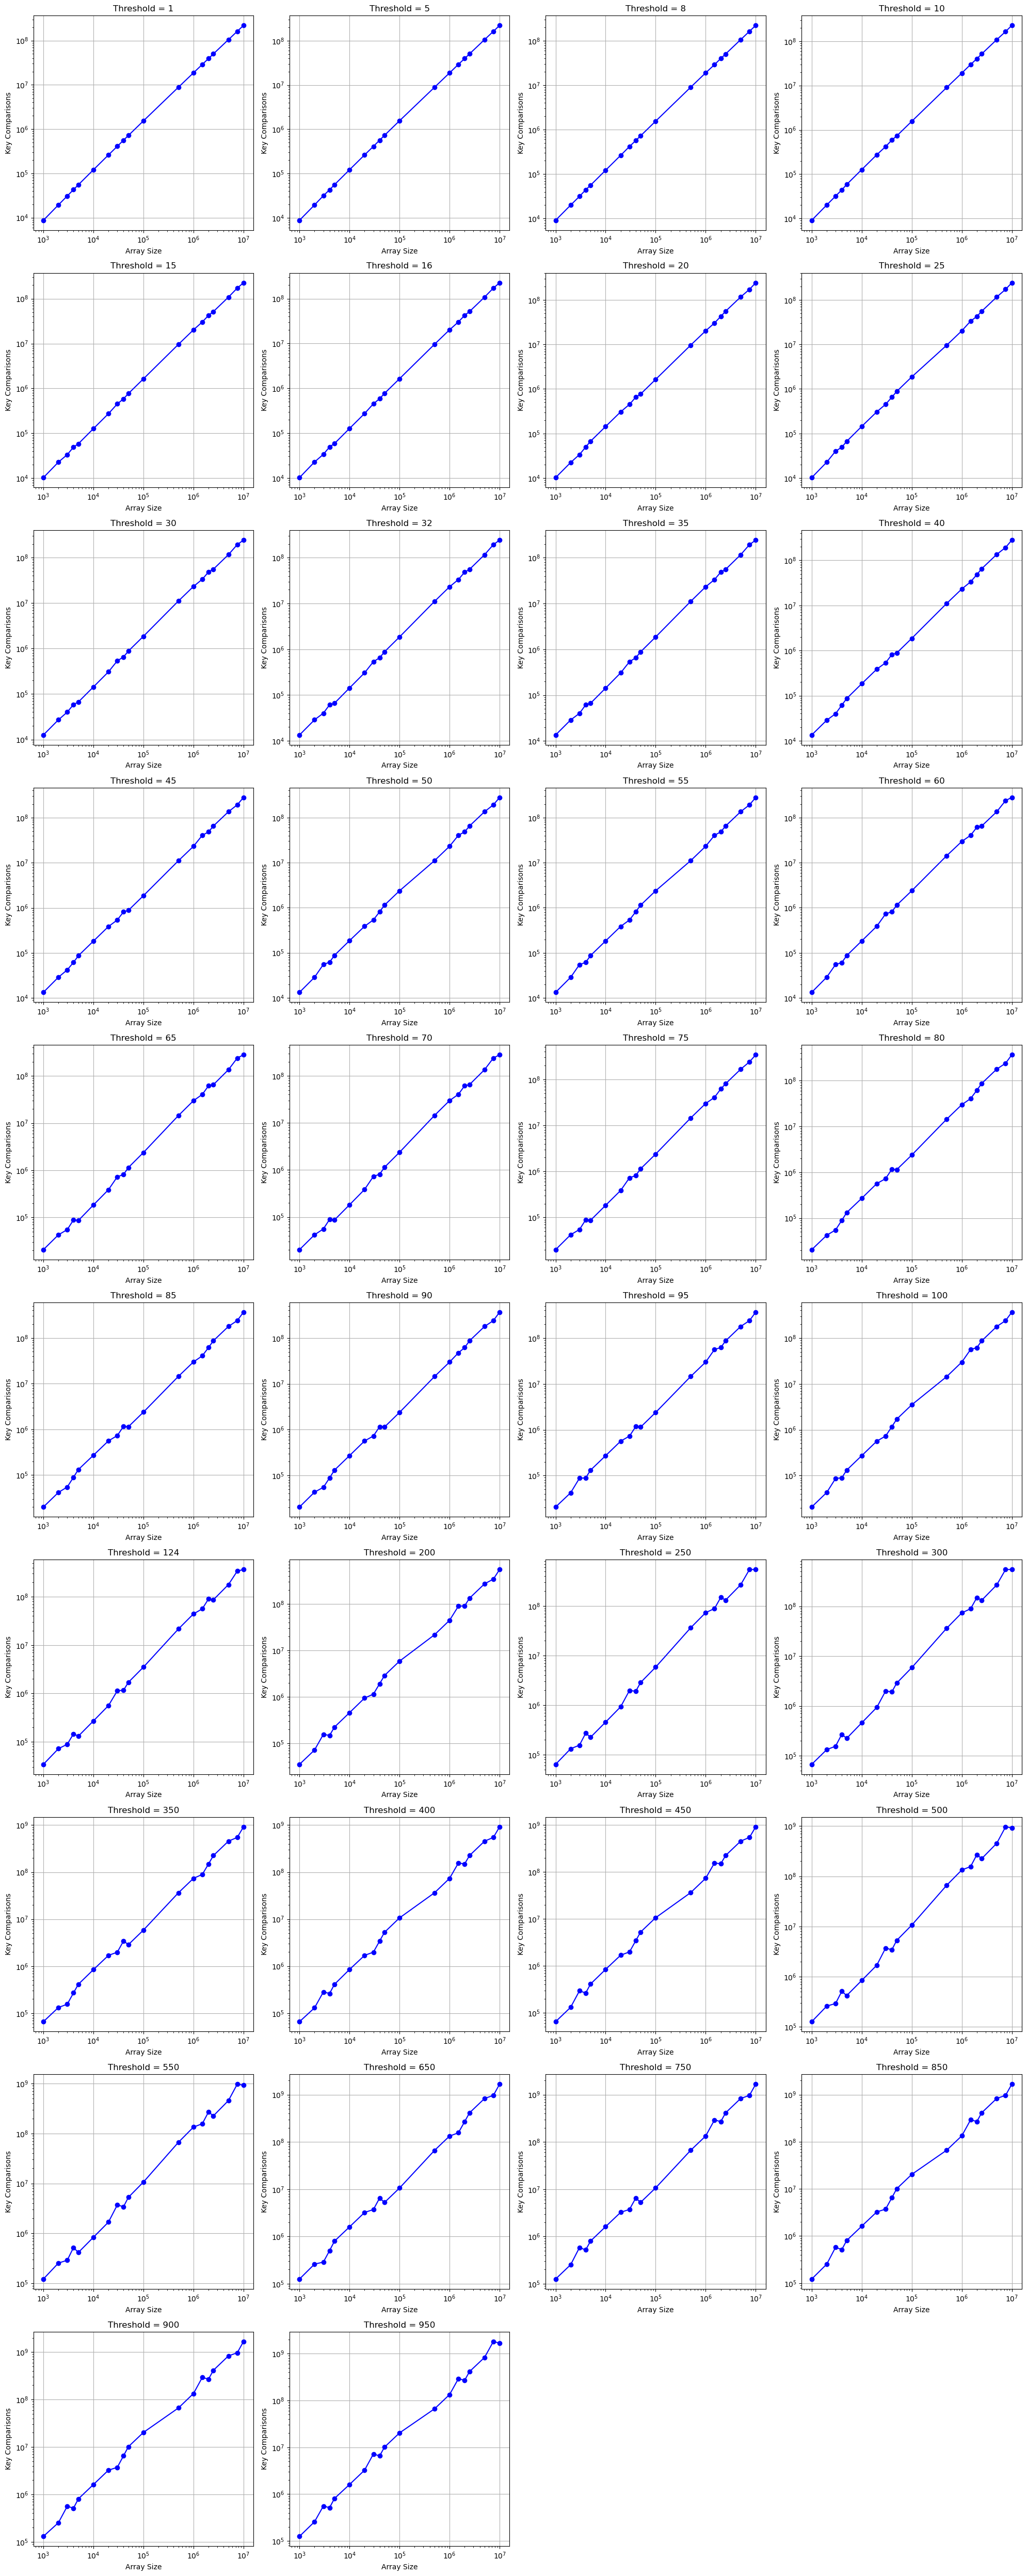

In [31]:
import math

# Calculate how many rows and columns are needed
num_thresholds = len(unique_thresholds)
num_cols = 4  # Number of columns you want
num_rows = math.ceil(num_thresholds / num_cols)  # Calculate rows based on the number of thresholds

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust height based on rows
axes = axes.flatten()

for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Logarithmic scale for array size
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

# Hide any unused subplots if necessary
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Empirical vs Theoretical 

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Assuming hybrid_df is already defined and contains the necessary data
n = hybrid_df['Array Size'].unique()

# Calculate the number of unique thresholds
unique_thresholds = hybrid_df['Threshold'].unique()

# Adjust the number of rows and columns to fit all unique thresholds
num_plots = len(unique_thresholds)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(55, 55)) 
axes = axes.flatten()

# Define fixed scales for both x and y axes
x_min, x_max = min(n), max(n)
y_min, y_max = 0, hybrid_df['Comparisons'].max()

for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    k = Threshold
    theoretical_values = n*k + n*np.log2(n/k) #HybridMergeInsertion worst case O(nk + n log (n/k)
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')
    axes[i].plot(n, theoretical_values, label="Theoretical", linestyle="--", color="red")

    # Set fixed axis limits
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Comparisons')
    axes[i].grid(True)

# Hide any empty subplots
for ax in axes[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## cii. (Fixed Array Size) Key Comparisons vs Threshold

In [ ]:
unique_array_sizes = hybrid_df['Array Size'].unique()

num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Comparisons'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    
    # Plot Key Comparisons vs Threshold on the corresponding subplot
    #axes[i].plot(df_size['Threshold'], df_size['Comparisons'], marker='o', linestyle='-', color='b')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons if necessary

# Adjust layout so that titles and labels don't overlap
plt.tight_layout()

plt.show()

## ciii. (Fixed Array Size) Time Complexity vs Threshold

In [ ]:
num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Time (ms)'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    
    # Plot Time vs Threshold on the corresponding subplot
    #axes[i].plot(df_size['Threshold'], df_size['Time (ms)'], marker='o', linestyle='-', color='b')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Time (ms)')
    axes[i].grid(True)
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons if necessary

plt.tight_layout()

plt.show()

## 4. Compare with original MergeSort
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above
hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with <b>10 million integers</b>.

# 下面的没有用到but我放着as a reference先 

## Key Comparisons
1. Emphirical vs Theoretical (for Hybrid Merge-Insertion Sort)
2. Hybrid Merge-Insertion Sort vs Standard Merge Sort

In [ ]:
'''
n = hybrid_df["n"].unique()
k = threshold
theoretical_values = 

# line plot for Emphirical vs Theoretical
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[0], label="Emphirical")
ax[0].set_title("Empirical vs Theoretical") 

# Plot the theoretical analysis curve
ax[0].plot(
    n_values, theoretical_values, label="Theoretical", linestyle="--", color="red"
)
ax[0].legend() 


# line plot for Hybrid vs Standard Merge Sort
sb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[1], label="Hybrid Merge Sort", color="blue")
sb.lineplot(data=standard_merge_df, y="compareCount", x="n", ax=ax[0], label="Standard Merge Sort", color="red")
ax[1].set_title("Hybrid vs Standard")  

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 50_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()
'''

## Run Time
1. Hybrid Merge-Insertion Sort (Emphirical)
2. Hybrid Merge-Insertion Sort vs Standard Merge Sort

In [9]:
'''
# line plot for key comparison
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[0], label="Emphirical")
ax[0].set_title("Hybrid (Emphirical)")  # set title for first subplot
ax[0].legend()  # Add a legend to the plot

# line plot for time
sb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[1], label="Emphirical", color="blue")
sb.lineplot(data=standard_merge_df,y="time",x="n",ax=ax[1], label="Emphirical", color="red")
ax[1].set_title("Hybrid vs Standard")  # set title for second subplot

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 50_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()
'''

'\n# line plot for key comparison\nf, ax = plt.subplots(1, 2, figsize=(15, 5))\n\nsb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[0], label="Emphirical")\nax[0].set_title("Hybrid (Emphirical)")  # set title for first subplot\nax[0].legend()  # Add a legend to the plot\n\n# line plot for time\nsb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[1], label="Emphirical", color="blue")\nsb.lineplot(data=standard_merge_df,y="time",x="n",ax=ax[1], label="Emphirical", color="red")\nax[1].set_title("Hybrid vs Standard")  # set title for second subplot\n\n# Set x-axis limits to show from 0 to 50,000,000\nx_min = 0\nx_max = 50_000_000  # Use underscores for readability\n\nax[0].set_xlim(x_min, x_max)\nax[1].set_xlim(x_min, x_max)\n\n# tight layout to prevent overlapping\nplt.tight_layout()\n\nplt.show()\n'